In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
df = pd.read_csv("/Video_Games.csv")
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
#menampilkan data duplikat
df.duplicated().sum()

0

In [161]:
#menampilkan data yang hilang
df.isna().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [162]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)


In [163]:
#menampilkan data yang hilang
df.isna().sum()

,0
index,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [164]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['Name', 'Platform', 'Year_of_Release', 'Publisher', 'Critic_Count', 'User_Count', 'Developer', 'Genre',  'Critic_Score', 'User_Score', 'Rating']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6938 entries, 0 to 16926
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6938 non-null   int64  
 1   NA_Sales      6938 non-null   float64
 2   EU_Sales      6938 non-null   float64
 3   JP_Sales      6938 non-null   float64
 4   Other_Sales   6938 non-null   float64
 5   Global_Sales  6938 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 379.4 KB


In [166]:
df = df.astype(int)

In [167]:
# 2. Preprocessing Data
# Pilih fitur dan target
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'

# Pastikan tidak ada nilai NaN atau data yang tidak valid
df = df.dropna(subset=features + [target])


In [168]:
# Pisahkan fitur (X) dan target (y)
X = df[features]
y = df[target]

# Ubah target menjadi kategori untuk klasifikasi
median_sales = y.median()
y_class = (y > median_sales).astype(int)  # 1 jika lebih dari median, 0 jika tidak


In [169]:
# 3. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [170]:
# 4. Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [171]:
# 5. Evaluate Model
y_pred = model.predict(X_test)

In [172]:
# Confusion Matrix dan Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1114    0]
 [ 111  163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1114
           1       1.00      0.59      0.75       274

    accuracy                           0.92      1388
   macro avg       0.95      0.80      0.85      1388
weighted avg       0.93      0.92      0.91      1388



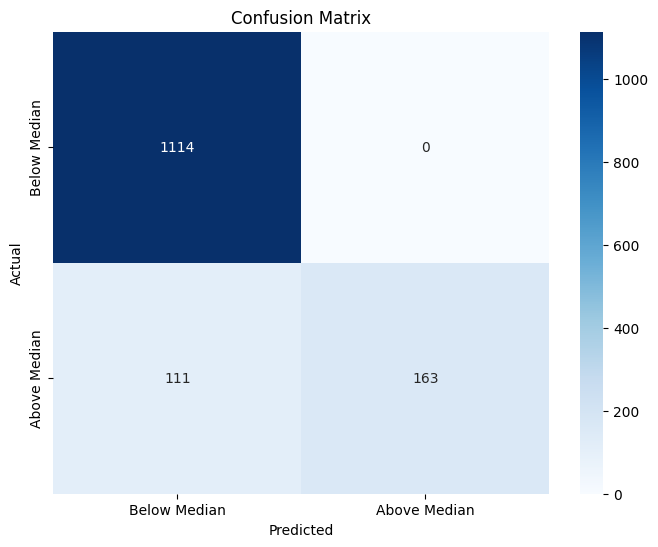

In [173]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()